In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img1 = cv2.imread('../meta/dog_backpack.png')
img2 = cv2.imread('../meta/watermark_no_copy.png')

In [3]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [4]:
img1.shape

(1401, 934, 3)

In [5]:
img2.shape

(1280, 1277, 3)

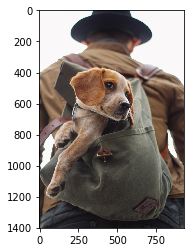

In [6]:
plt.imshow(img1)

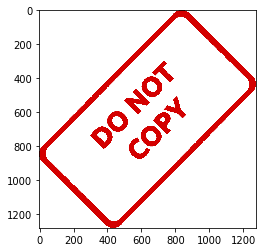

In [7]:
plt.imshow(img2)

# Blending Images of same size

In [8]:
img1_ =cv2.resize(img1,(1200,1200))
img2_ =cv2.resize(img2,(1200,1200))

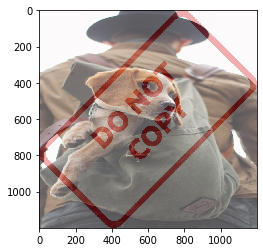

In [9]:
blended = cv2.addWeighted(src1=img1_,alpha=0.7,src2=img2_,beta=0.3,gamma=0)
plt.imshow(blended)

# Overlaying Images

In [10]:
large_img = img1.copy()
small_img = cv2.resize(img2,(600,600))

In [11]:
x_offset=0
y_offset=0

In [12]:
large_img[y_offset:y_offset+small_img.shape[0],
          x_offset:x_offset+small_img.shape[1]] = small_img

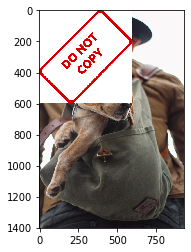

In [13]:
plt.imshow(large_img)

# Blending Images of Different Size

In [14]:
img2 =cv2.resize(img2,(600,600))
img1.shape

(1401, 934, 3)

## Creating Region of Interest

In [15]:
x_offset=934-600
y_offset=1401-600

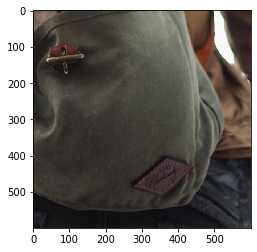

In [16]:
roi = img1[y_offset:1401,x_offset:943] # BOTTOM RIGHT CORNER
plt.imshow(roi)

## Creating Mask

(600, 600)


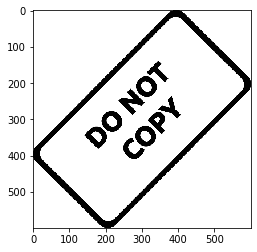

In [17]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
print(img2gray.shape)
plt.imshow(img2gray,cmap='gray')

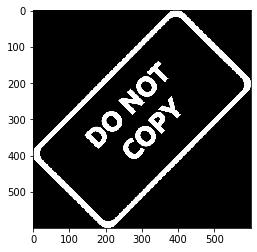

In [18]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,cmap='gray')

## Grab Original FG image and place on top of Mask

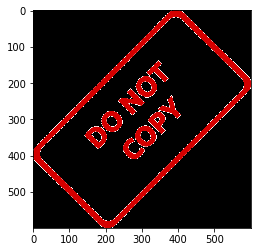

In [19]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

## Get ROI and blend in the mask with the ROI

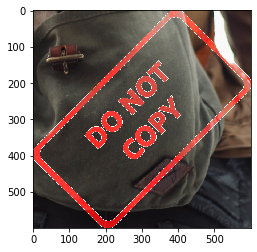

In [20]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

## Now add in the rest of the image

In [21]:
large_img = img1.copy()

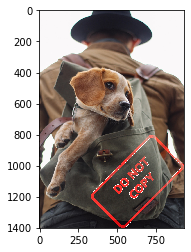

In [22]:
large_img[y_offset:y_offset+final_roi.shape[0], x_offset:x_offset+final_roi.shape[1]] = final_roi

plt.imshow(large_img)